In [44]:
import pandas as pd
from helper import unzip_gz, zip_gz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
crop_df = unzip_gz("../data/clean_crop_27_v2.gz")
crop_df.head()

,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,DOMAIN_DESC,DOMAINCAT_DESC,AGG_LEVEL_DESC,ASD_DESC,COUNTY_NAME,LOCATION_DESC,YEAR,FREQ_DESC,REFERENCE_PERIOD_DESC,WEEK_ENDING,VALUE
0,SOYBEANS,ALL CLASSES,ALL PRODUCTION PRACTICES,YIELD,BU / ACRE,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,COUNTY,SOUTHWEST,CASS,MICHIGAN,1972,ANNUAL,YEAR,NaN,23.1
1,SOYBEANS,ALL CLASSES,ALL PRODUCTION PRACTICES,STOCKS,BU,"SOYBEANS, ON FARM - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,STATE,NaN,NaN,TENNESSEE,1965,POINT IN TIME,FIRST OF DEC,NaN,"2,236,000"
2,SUGARBEETS,ALL CLASSES,ALL PRODUCTION PRACTICES,SUCROSE,PCT,"SUGARBEETS - SUCROSE, MEASURED IN PCT",TOTAL,NOT SPECIFIED,COUNTY,NORTHWEST,PUTNAM,OHIO,1983,ANNUAL,YEAR,NaN,16.26
3,HAY,ALL CLASSES,ALL PRODUCTION PRACTICES,PRODUCTION,TONS,"HAY - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,COUNTY,NORTHWEST,ANDREW,MISSOURI,1992,ANNUAL,YEAR,NaN,"49,500"
4,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,PRODUCTION,TONS,"CORN, SILAGE - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,COUNTY,CENTRAL,CORTLAND,NEW YORK,1991,ANNUAL,YEAR,NaN,"184,200"


In [3]:
crop_df = crop_df.drop(columns=["AGG_LEVEL_DESC",	"ASD_DESC",	"COUNTY_NAME"])
crop_df = crop_df[~crop_df['LOCATION_DESC'].str.contains('OTHER STATES|US TOTAL', case=False, na=False)]

crop_df = crop_df.loc[crop_df['YEAR'] >= 1980]
crop_df['VALUE'] = pd.to_numeric(crop_df['VALUE'], errors='coerce')
crop_df = crop_df.dropna(subset=['VALUE'])
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6980455 entries, 2 to 14880564
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   COMMODITY_DESC         object 
 1   CLASS_DESC             object 
 2   PRODN_PRACTICE_DESC    object 
 3   STATISTICCAT_DESC      object 
 4   UNIT_DESC              object 
 5   SHORT_DESC             object 
 6   DOMAIN_DESC            object 
 7   DOMAINCAT_DESC         object 
 8   LOCATION_DESC          object 
 9   YEAR                   int64  
 10  FREQ_DESC              object 
 11  REFERENCE_PERIOD_DESC  object 
 12  WEEK_ENDING            object 
 13  VALUE                  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 798.8+ MB


In [37]:
common_units = []

for unit, number in crop_df['UNIT_DESC'].value_counts().items():
    if number >= 100:
        common_units.append(unit)

crop_df = crop_df[crop_df['UNIT_DESC'].isin(common_units)]


In [39]:
crop_df

,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,DOMAIN_DESC,DOMAINCAT_DESC,LOCATION_DESC,YEAR,FREQ_DESC,REFERENCE_PERIOD_DESC,WEEK_ENDING,VALUE
2,SUGARBEETS,ALL CLASSES,ALL PRODUCTION PRACTICES,SUCROSE,PCT,"SUGARBEETS - SUCROSE, MEASURED IN PCT",TOTAL,NOT SPECIFIED,OHIO,1983,ANNUAL,YEAR,NaN,16.26
10,SUNFLOWER,ALL CLASSES,ALL PRODUCTION PRACTICES,AREA PLANTED,ACRES,SUNFLOWER - ACRES PLANTED,TOTAL,NOT SPECIFIED,NEBRASKA,1993,ANNUAL,YEAR,NaN,200.00
13,SOYBEANS,ALL CLASSES,ALL PRODUCTION PRACTICES,YIELD,BU / ACRE,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,INDIANA,2014,ANNUAL,YEAR,NaN,50.60
16,SOYBEANS,ALL CLASSES,ALL PRODUCTION PRACTICES,"CONDITION, PREVIOUS YEAR",PCT VERY POOR,"SOYBEANS - CONDITION, PREVIOUS YEAR, MEASURED ...",TOTAL,NOT SPECIFIED,LOUISIANA,2018,WEEKLY,WEEK #22,2018-06-03,1.00
20,BEANS,SNAP,ALL PRODUCTION PRACTICES,AREA HARVESTED,ACRES,"BEANS, SNAP - ACRES HARVESTED",TOTAL,NOT SPECIFIED,NEW YORK,2007,ANNUAL,YEAR,NaN,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880559,COTTON,UPLAND,ALL PRODUCTION PRACTICES,"CONDITION, 5 YEAR AVG",PCT EXCELLENT,"COTTON, UPLAND - CONDITION, 5 YEAR AVG, MEASUR...",TOTAL,NOT SPECIFIED,ALABAMA,2024,WEEKLY,WEEK #30,2024-07-28,9.00
14880560,APPLES,ALL CLASSES,ALL PRODUCTION PRACTICES,"CONDITION, PREVIOUS YEAR",PCT VERY POOR,"APPLES - CONDITION, PREVIOUS YEAR, MEASURED IN...",TOTAL,NOT SPECIFIED,VERMONT,2024,WEEKLY,WEEK #34,2024-08-25,0.00
14880561,SOYBEANS,ALL CLASSES,ALL PRODUCTION PRACTICES,"CONDITION, PREVIOUS YEAR",PCT FAIR,"SOYBEANS - CONDITION, PREVIOUS YEAR, MEASURED ...",TOTAL,NOT SPECIFIED,SOUTH DAKOTA,2024,WEEKLY,WEEK #29,2024-07-21,34.00
14880563,PEANUTS,ALL CLASSES,ALL PRODUCTION PRACTICES,"CONDITION, 5 YEAR AVG",PCT FAIR,"PEANUTS - CONDITION, 5 YEAR AVG, MEASURED IN P...",TOTAL,NOT SPECIFIED,FLORIDA,2024,WEEKLY,WEEK #32,2024-08-11,25.00


In [45]:
df = crop_df.copy()

# Apply log transformation to 'VALUE'
# Use np.log1p to handle zero values safely
df['log_value'] = np.log1p(df['VALUE'])

# Compute group-wise lower and upper percentiles on log-transformed data
# Here, we're using the 5th and 95th percentiles
df['lower_percentile'] = df.groupby(['COMMODITY_DESC', 'UNIT_DESC'])['log_value'].transform(lambda x: x.quantile(0.05))
df['upper_percentile'] = df.groupby(['COMMODITY_DESC', 'UNIT_DESC'])['log_value'].transform(lambda x: x.quantile(0.95))

# Clip log-transformed values to the percentile range
df['clipped_log_value'] = df['log_value'].clip(lower=df['lower_percentile'], upper=df['upper_percentile'])

# Apply the normalization formula
df['normalized_value'] = (
    (df['clipped_log_value'] - df['lower_percentile']) /
    (df['upper_percentile'] - df['lower_percentile'])
) * 100

# Handle division by zero when lower_percentile == upper_percentile
equal_percentile_mask = df['upper_percentile'] == df['lower_percentile']
df.loc[equal_percentile_mask, 'normalized_value'] = df.loc[equal_percentile_mask, 'VALUE'].apply(lambda x: 100 if x != 0 else 0)

# Clip normalized values to be between 0 and 100
df['normalized_value'] = df['normalized_value'].clip(lower=0, upper=100)

/Users/masongalusha/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/masongalusha/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/masongalusha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


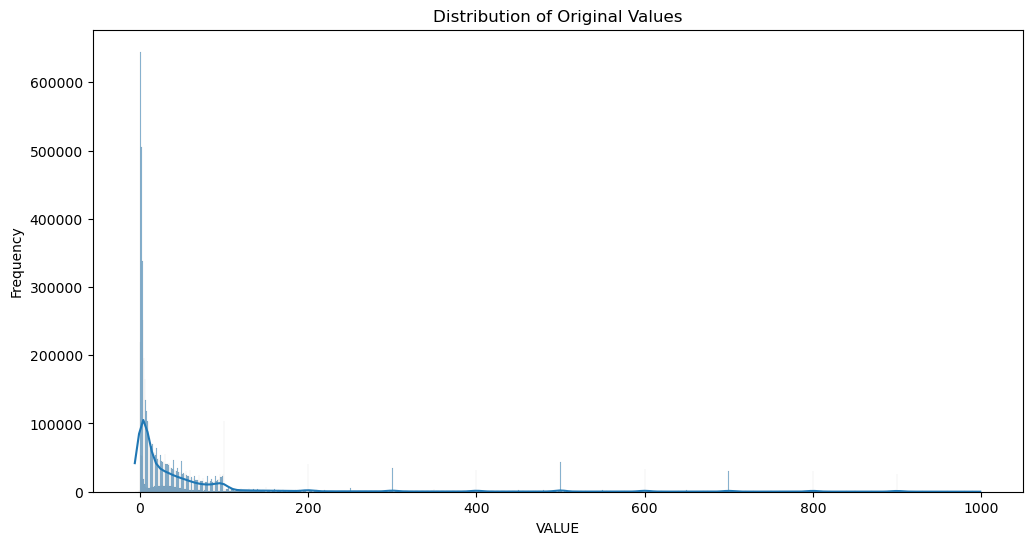

/Users/masongalusha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


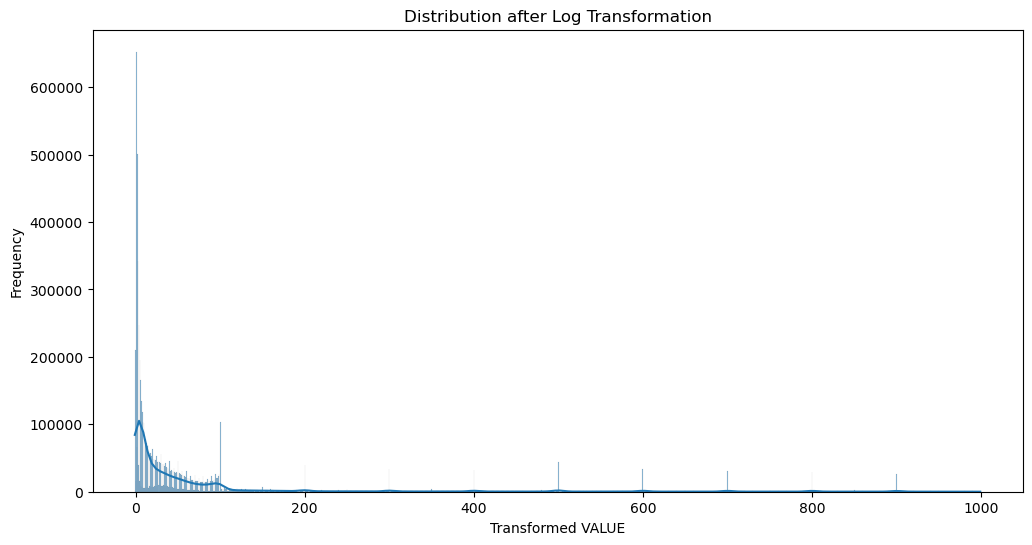

/Users/masongalusha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


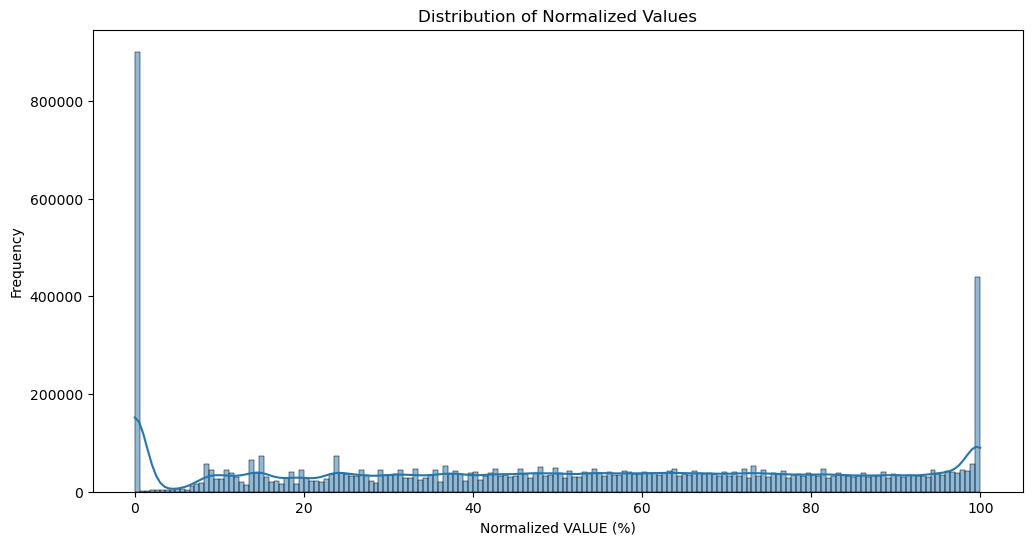

In [48]:
# Before transformation
plt.figure(figsize=(12, 6))
sns.histplot(df['VALUE'], kde=True)
plt.title('Distribution of Original Values')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.show()

# After log transformation
plt.figure(figsize=(12, 6))
sns.histplot(np.expm1(df['log_value']), kde=True)
plt.title('Distribution after Log Transformation')
plt.xlabel('Transformed VALUE')
plt.ylabel('Frequency')
plt.show()

# After normalization
plt.figure(figsize=(12, 6))
sns.histplot(df['normalized_value'], kde=True)
plt.title('Distribution of Normalized Values')
plt.xlabel('Normalized VALUE (%)')
plt.ylabel('Frequency')
plt.show()

In [53]:
df.head()

,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,DOMAIN_DESC,DOMAINCAT_DESC,LOCATION_DESC,YEAR,FREQ_DESC,REFERENCE_PERIOD_DESC,WEEK_ENDING,VALUE,log_value,lower_percentile,upper_percentile,clipped_log_value,normalized_value
2,SUGARBEETS,ALL CLASSES,ALL PRODUCTION PRACTICES,SUCROSE,PCT,"SUGARBEETS - SUCROSE, MEASURED IN PCT",TOTAL,NOT SPECIFIED,OHIO,1983,ANNUAL,YEAR,NaN,16.26,2.848392,2.721295,2.977059,2.848392,49.692868
10,SUNFLOWER,ALL CLASSES,ALL PRODUCTION PRACTICES,AREA PLANTED,ACRES,SUNFLOWER - ACRES PLANTED,TOTAL,NOT SPECIFIED,NEBRASKA,1993,ANNUAL,YEAR,NaN,200.00,5.303305,2.708050,6.803505,5.303305,63.369141
13,SOYBEANS,ALL CLASSES,ALL PRODUCTION PRACTICES,YIELD,BU / ACRE,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,INDIANA,2014,ANNUAL,YEAR,NaN,50.60,3.943522,2.890372,4.028917,3.943522,92.499630
16,SOYBEANS,ALL CLASSES,ALL PRODUCTION PRACTICES,"CONDITION, PREVIOUS YEAR",PCT VERY POOR,"SOYBEANS - CONDITION, PREVIOUS YEAR, MEASURED ...",TOTAL,NOT SPECIFIED,LOUISIANA,2018,WEEKLY,WEEK #22,2018-06-03,1.00,0.693147,0.000000,2.397895,0.693147,28.906483
20,BEANS,SNAP,ALL PRODUCTION PRACTICES,AREA HARVESTED,ACRES,"BEANS, SNAP - ACRES HARVESTED",TOTAL,NOT SPECIFIED,NEW YORK,2007,ANNUAL,YEAR,NaN,13.00,2.639057,0.693147,6.685861,2.639057,32.471268


In [54]:
final_df = df[['COMMODITY_DESC', 'LOCATION_DESC', 'YEAR', 'normalized_value']].reset_index(drop=True)
final_df

,COMMODITY_DESC,LOCATION_DESC,YEAR,normalized_value
0,SUGARBEETS,OHIO,1983,49.692868
1,SUNFLOWER,NEBRASKA,1993,63.369141
2,SOYBEANS,INDIANA,2014,92.499630
3,SOYBEANS,LOUISIANA,2018,28.906483
4,BEANS,NEW YORK,2007,32.471268
...,...,...,...,...
6980133,COTTON,ALABAMA,2024,63.299809
6980134,APPLES,VERMONT,2024,0.000000
6980135,SOYBEANS,SOUTH DAKOTA,2024,77.026144
6980136,PEANUTS,FLORIDA,2024,60.024911


In [56]:
final_df.to_csv('../data/clean_crop_data.csv', index=False)